# KNN-K-Nearest Neighbour.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


In [2]:
df = pd.read_csv('diabetes.csv')
print(len(df))
df.head()

768


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [5]:
X = df.iloc[:,0:8]
y = df.iloc[:,8]
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.2)


In [6]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [7]:
import math
math.sqrt(len(y_test))

12.409673645990857

In [15]:
#Define the model.
classifier = KNeighborsClassifier(n_neighbors=5, p=2, metric='euclidean')

In [16]:
#Fit model.
classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [17]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [23]:
print(f1_score(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)
print(cm)

0.6593406593406593
[[93 14]
 [17 30]]


In [21]:
print("The accuracy_score of the model is:{}".format(accuracy_score(y_test,y_pred)))

The accuracy_score of the model is:0.7987012987012987


# Confusion_matrix_diagram

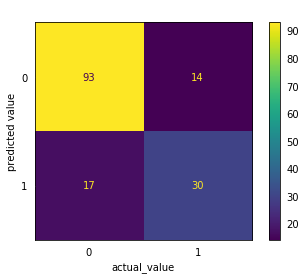

In [24]:
matrix = plot_confusion_matrix(classifier,X_test,y_test)
matrix.ax_.set_title('Confusion_matrix',color='white')
plt.xlabel('actual_value')
plt.ylabel('predicted value')
plt.gcf().axes[0].tick_params(color='white')
plt.gcf().axes[1].tick_params(color='white')
plt.show()